# This data about the patients in Brazil and the factors that affect the show up or not show up appointment

# what is neighbour that have the most show up appointment

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('addemption.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# the data has not missing values

In [4]:
df.shape

(110527, 14)

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [7]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E72404A128>,
      dtype=object)

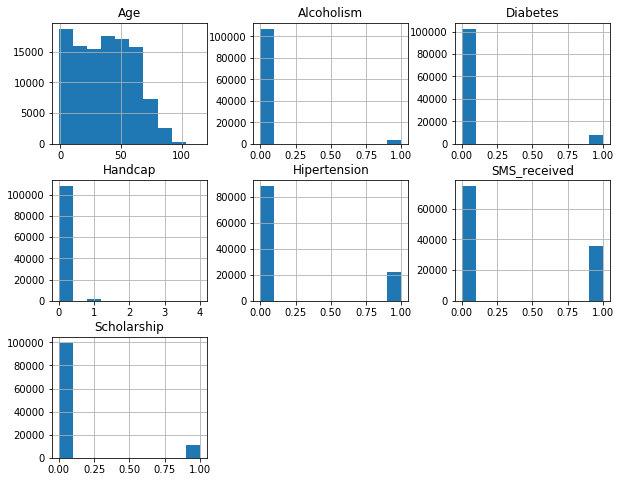

In [8]:
df.hist(figsize=(10,8))

# Question: which Neighbourhood has the least show up appointment??

In [9]:
f=lambda x:True if x=='Yes' else False

In [10]:
df['No-show']=df['No-show'].apply(f)

In [11]:
neighbourhood=df.groupby('Neighbourhood')['No-show'].sum()

In [12]:
neighbourhood=neighbourhood-neighbourhood.mean()/neighbourhood.std()

In [13]:
neighbourhood.sort_values(inplace=True,ascending=False)

In [14]:
neighbourhood.astype(int)

Neighbourhood
JARDIM CAMBURI                 1464
MARIA ORTIZ                    1218
ITARARÉ                         922
RESISTÊNCIA                     905
CENTRO                          702
JESUS DE NAZARETH               695
JARDIM DA PENHA                 630
CARATOÍRA                       590
TABUAZEIRO                      572
BONFIM                          549
ILHA DO PRÍNCIPE                531
ANDORINHAS                      520
SÃO PEDRO                       514
SANTO ANDRÉ                     507
SANTA MARTHA                    495
SANTO ANTÔNIO                   483
ROMÃO                           473
GURIGICA                        455
JABOUR                          450
DA PENHA                        428
SÃO JOSÉ                        427
MARUÍPE                         423
NOVA PALESTINA                  401
BELA VISTA                      383
SANTOS DUMONT                   368
SÃO CRISTÓVÃO                   362
ILHA DE SANTA MARIA             360
FORTE SÃO JOÃO

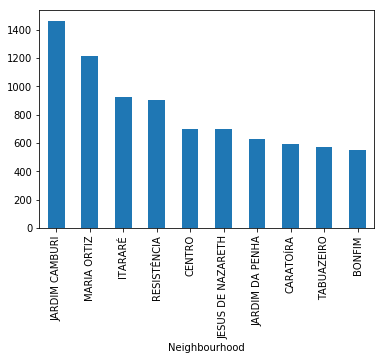

In [15]:
neighbourhood[:10].plot(kind='bar')

# Question: which Neighbourhood has the least show up appointment??


In [16]:
gender_show=df.groupby('Gender')['No-show'].sum()
gender_show=gender_show/df['No-show'].sum()*100

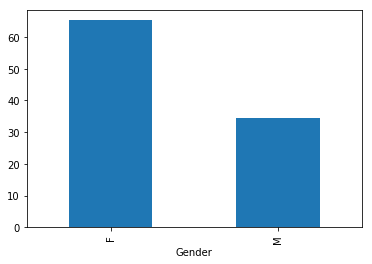

In [17]:
gender_show.plot(kind='bar')

# Question: which illness has the least show up appointment??


In [18]:
kind_of_illness=df.groupby('No-show')['Hipertension','Diabetes','Alcoholism','Handcap'].sum()

In [20]:
kind_of_illness=kind_of_illness.iloc[1]

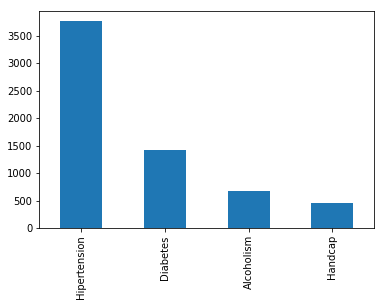

In [21]:
kind_of_illness.plot(kind='bar')

# which time of day has most show up in time

In [22]:
time=lambda x:x[11:13]

In [23]:
df['ScheduledDay']=df['ScheduledDay'].apply(time)

In [24]:
df['ScheduledDay'].astype(int)

0         18
1         16
2         16
3         17
4         16
5          8
6         15
7         15
8          8
9         12
10        14
11         8
12        11
13        14
14        10
15         8
16         8
17         9
18        10
19        10
20         7
21        10
22        13
23        10
24        14
25        15
26        14
27        10
28        15
29        15
          ..
110497     9
110498    10
110499     9
110500     9
110501    10
110502    10
110503    13
110504    11
110505    10
110506    11
110507     9
110508     9
110509     8
110510     9
110511     8
110512     8
110513     7
110514     8
110515    15
110516     7
110517     7
110518    15
110519    15
110520     7
110521     8
110522     9
110523     7
110524    16
110525    15
110526    13
Name: ScheduledDay, Length: 110527, dtype: int32

In [25]:
bins=[0,6,12,18]

In [26]:
df['ScheduledDay']=df['ScheduledDay'].astype(int)

In [28]:
time_cat=pd.cut(df['ScheduledDay'],bins)
df['time']=time_cat

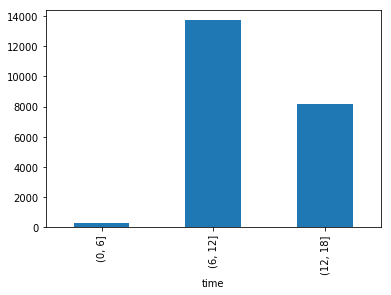

In [30]:
df.groupby('time')['No-show'].sum().plot(kind='bar')